In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [3]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


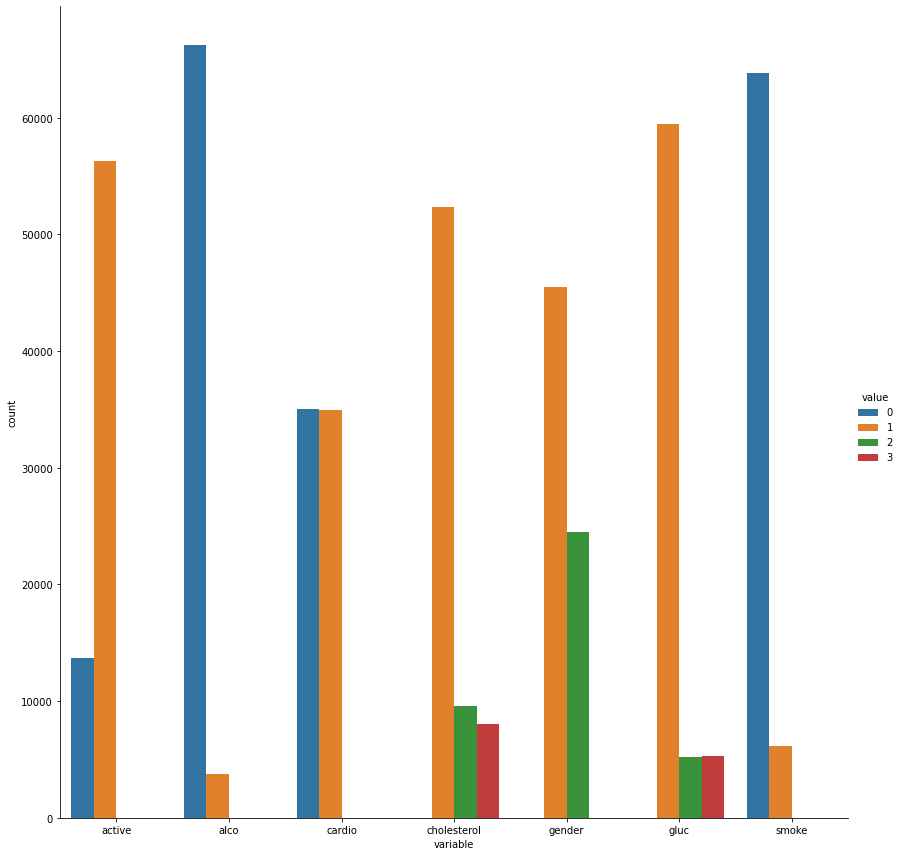

In [4]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.factorplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar", size=12
);

In [5]:
df.groupby('gender').size()

gender
1    45530
2    24470
dtype: int64

In [6]:
df.alco.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='gender', ylabel='count'>

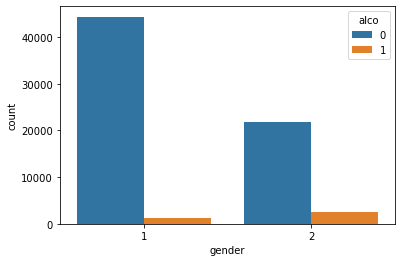

In [7]:
sns.countplot(x='gender', hue='alco', data=df)

In [8]:
df[['gender', 'smoke']].value_counts(normalize=True)

gender  smoke
1       0        0.638814
2       0        0.273057
        1        0.076514
1       1        0.011614
dtype: float64

In [9]:
df.groupby(['gender', 'smoke']).size()

gender  smoke
1       0        44717
        1          813
2       0        19114
        1         5356
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

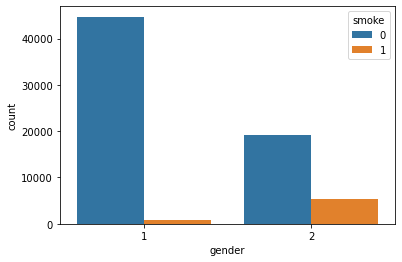

In [10]:
sns.countplot(x='gender', hue='smoke', data=df)

In [11]:
smokers_amg_mf = df[df['smoke'] == 1].groupby('gender')['smoke'].count()

In [12]:
smokers_amg_mf

gender
1     813
2    5356
Name: smoke, dtype: int64

In [13]:
smokers_amg_mf.iloc[0] / df[df['gender'] == 1].shape[0]

0.017856358444981332

In [14]:
smokers_amg_mf.iloc[1] / df[df['gender'] == 2].shape[0]

0.21888026154474868

In [15]:
df['age'] = (df['age'] / 365) * 12

In [16]:
df.groupby('smoke')['age'].agg(np.median)

smoke
0    648.394521
1    628.767123
Name: age, dtype: float64

In [17]:
df['age_years'] = (df['age'] / 12)
df['age_years'] = df['age_years'].round()


In [18]:
df[df['age_years'].between(60, 64)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
5,8,720.460274,1,151,67.0,120,80,2,2,0,0,0,0,60.0
6,9,727.002740,1,157,93.0,130,80,3,1,0,0,1,0,61.0
7,12,742.487671,2,178,95.0,130,90,3,3,0,0,1,1,62.0
10,15,740.712329,1,169,80.0,120,80,1,1,0,0,1,0,62.0
19,29,715.232877,2,162,56.0,120,70,1,1,1,0,1,0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69973,99961,727.956164,2,175,72.0,130,80,1,1,0,0,1,0,61.0
69979,99969,737.194521,1,163,74.0,160,100,2,2,0,0,1,1,61.0
69988,99981,722.564384,1,160,59.0,110,70,1,1,0,0,1,0,60.0
69996,99995,743.046575,1,158,126.0,140,90,2,2,0,0,1,1,62.0


<AxesSubplot:>

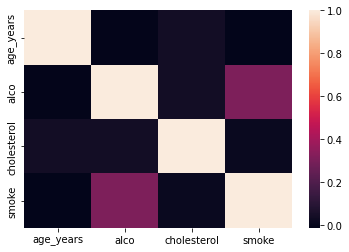

In [19]:
sns.heatmap(df[df['age_years'].between(60, 64)][['age_years', 'alco', 'cholesterol', 'smoke']].corr())

In [20]:
df['age_years'] = df['age_years'].astype('int64')

In [21]:
df_60_64 = df[df['age_years'].between(60, 64)]

In [22]:
df_60_64.groupby(['age_years', 'gender', 'cholesterol']).size()

age_years  gender  cholesterol
60         1       1              2569
                   2               543
                   3               653
           2       1              1218
                   2               230
                   3               252
61         1       1               503
                   2               129
                   3               179
           2       1               287
                   2                51
                   3                72
62         1       1              1549
                   2               362
                   3               458
           2       1              1117
                   2               196
                   3               244
63         1       1               388
                   2               107
                   3               153
           2       1               250
                   2                57
                   3                61
64         1       1             

<AxesSubplot:xlabel='cholesterol', ylabel='age_years-gender'>

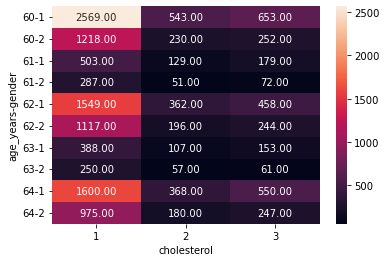

In [23]:
sns.heatmap(df_60_64.groupby(['age_years', 'gender', 'cholesterol']).size().unstack(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='cholesterol', ylabel='age_years-smoke'>

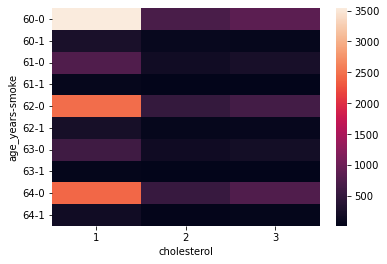

In [24]:
sns.heatmap(df_60_64.groupby(['age_years', 'smoke', 'cholesterol']).size().unstack())

In [25]:
df['ibm'] = (df['weight'] / np.square(df['height'] / 100))

In [26]:
df['ibm'].median()
# false

26.374068120774975

In [27]:
df.groupby('gender')['ibm'].agg(np.mean)
# True

gender
1    27.987583
2    26.754442
Name: ibm, dtype: float64

In [28]:
df.groupby('cardio')['ibm'].agg(np.mean)

cardio
0    26.548175
1    28.566061
Name: ibm, dtype: float64

In [29]:
df[(df['cardio'] == 0) & (df['alco'] == 0)].groupby('gender')['ibm'].agg(np.mean)

gender
1    26.845407
2    25.872638
Name: ibm, dtype: float64

In [30]:
df_quant = df[(df['ap_lo'] > df['ap_hi']) &
              (df['height'] < df['height'].quantile(0.025))&
              (df['height'] > df['height'].quantile(0.975)) &
              (df['weight'] < df['weight'].quantile(0.025)) &
              (df['weight'] > df['weight'].quantile(0.975))
             ]

In [31]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]

In [32]:
df_to_remove.shape[0]

6741

In [33]:
df_quant.shape

(0, 15)

<AxesSubplot:xlabel='height'>

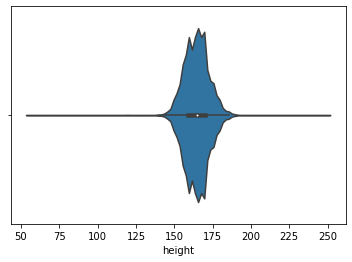

In [34]:
sns.violinplot(x=df['height'], hue=df['gender'])

In [35]:
ff = df.melt(id_vars='gender', value_vars='height')

In [36]:
ff

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156
...,...,...,...
69995,2,height,168
69996,1,height,158
69997,2,height,183
69998,1,height,163


<AxesSubplot:xlabel='variable', ylabel='value'>

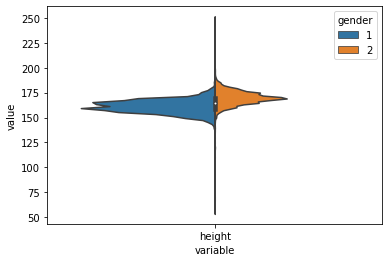

In [37]:
sns.violinplot(x='variable', y='value', hue='gender', data=ff, scale='count', split=True)

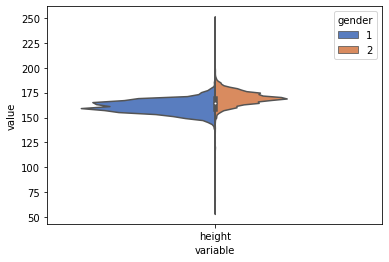

In [38]:
ax = sns.violinplot(
    x="variable",
    y="value",
    hue="gender",
    palette="muted",
    split=True,
    data=ff,
    scale="count",
    scale_hue=False,
)

<AxesSubplot:>

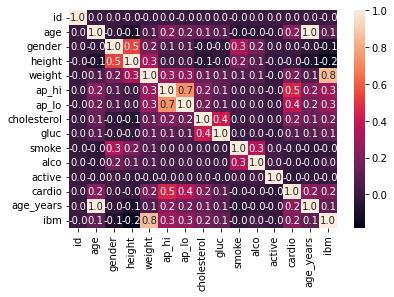

In [39]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.1f')

<Figure size 1080x1080 with 0 Axes>

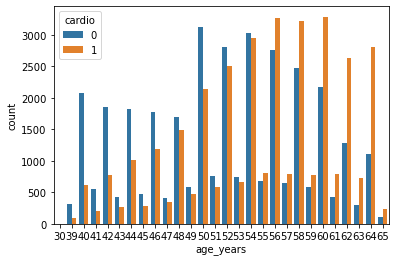

<Figure size 1080x1080 with 0 Axes>

In [50]:
sns.countplot(x='age_years', hue='cardio', data=df)
# plt.xticks(rotation=45)
plt.figure(figsize=(15, 15))

<AxesSubplot:xlabel='weight', ylabel='height'>

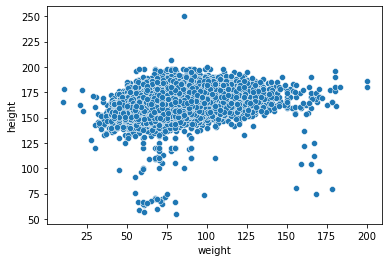

In [54]:
sns.scatterplot(data=df, x='weight', y='height')